In [13]:
import seaborn as sns
import pandas as pd
import configparser
import matplotlib.pyplot as plt
import ast
import numpy as np

In [15]:
data = pd.read_csv("../results/experiment2_stability_20241219-1122.csv")
#fix dataset
problematic_rows = data[data['number of random models'] == 0]
for index in problematic_rows.index:
    data.at[index, 'MSE'] = data.at[index, 'Method']  # Shift values forward by 1
    data.at[index, 'Method'] = data.at[index, 'Set Size']
    
for dataset in data['Data'].unique():
    # Find the correct "Set Size" value for the dataset where "number of random models" != 0
    set_size_value = data.loc[
        (data['Data'] == dataset) & (data['number of random models'] != 0), 'Set Size'
    ].unique()[0]
    # Fill missing values in "Set Size" for problematic rows in this dataset
    data.loc[(data['Data'] == dataset) & (data['number of random models'] == 0), 'Set Size'] = set_size_value

/var/folders/v_/d3hz__gx7y9ffy_rls7zbjpm0000gn/T/ipykernel_47711/1420492815.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.188' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.at[index, 'MSE'] = data.at[index, 'Method']  # Shift values forward by 1


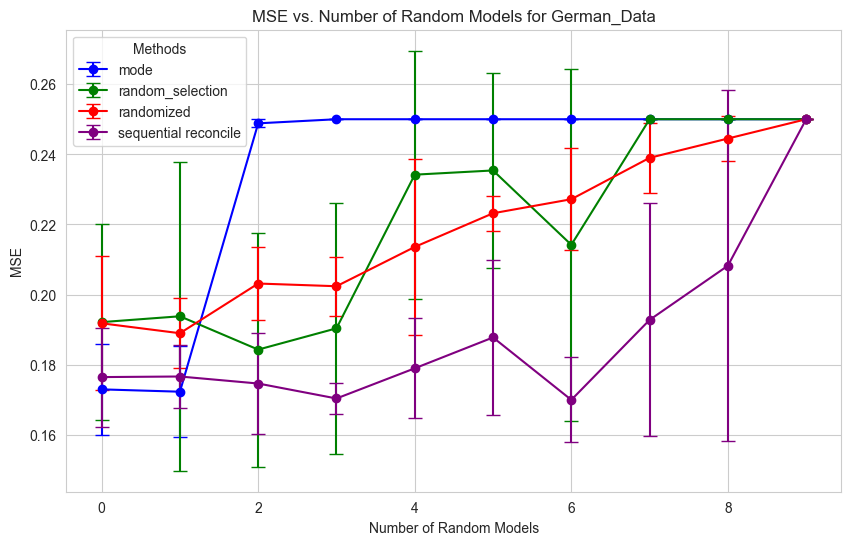

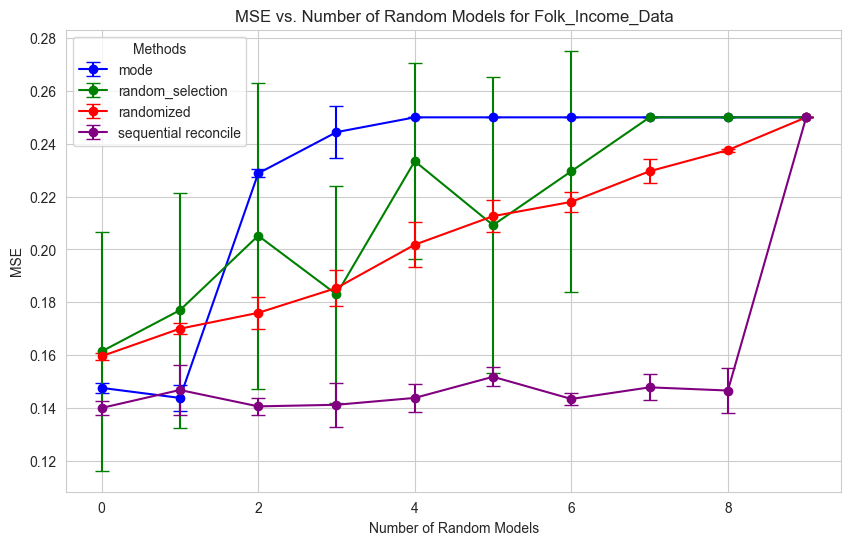

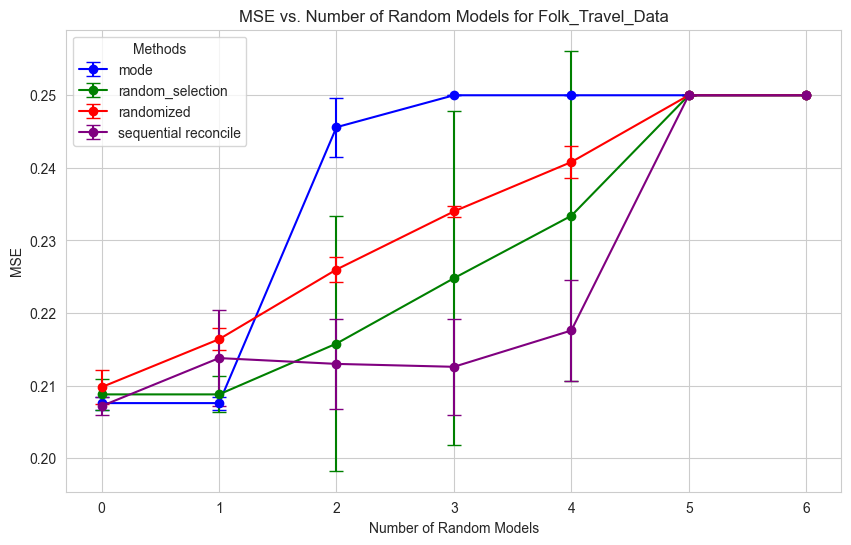

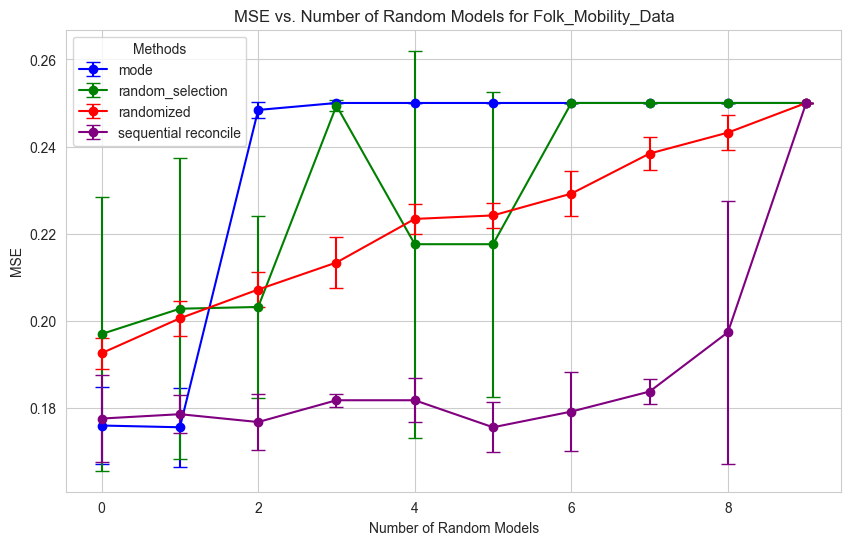

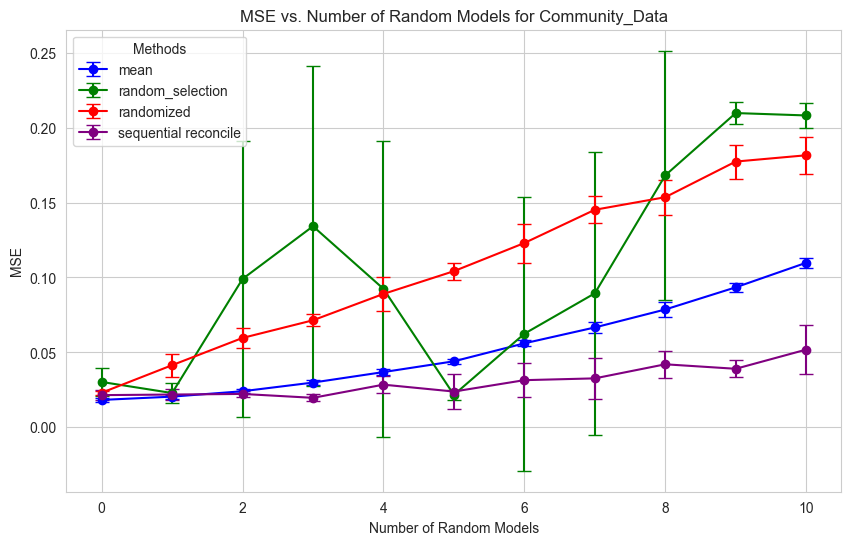

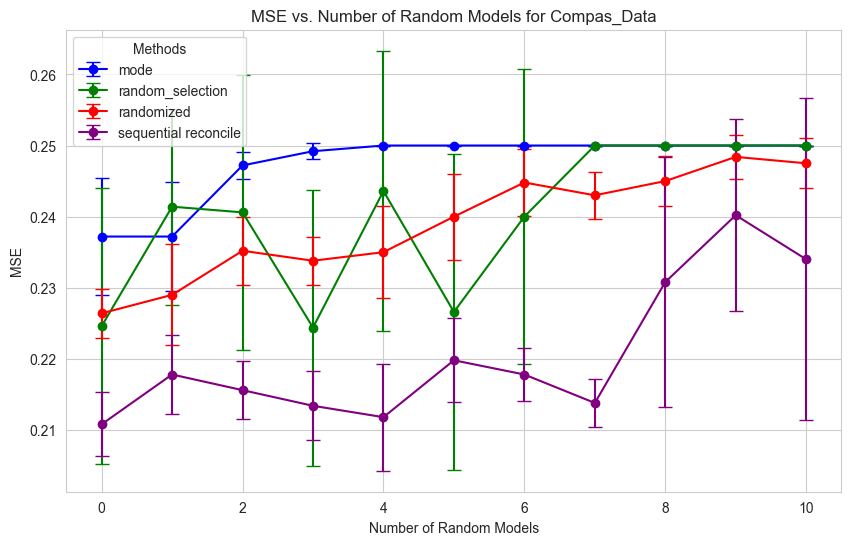

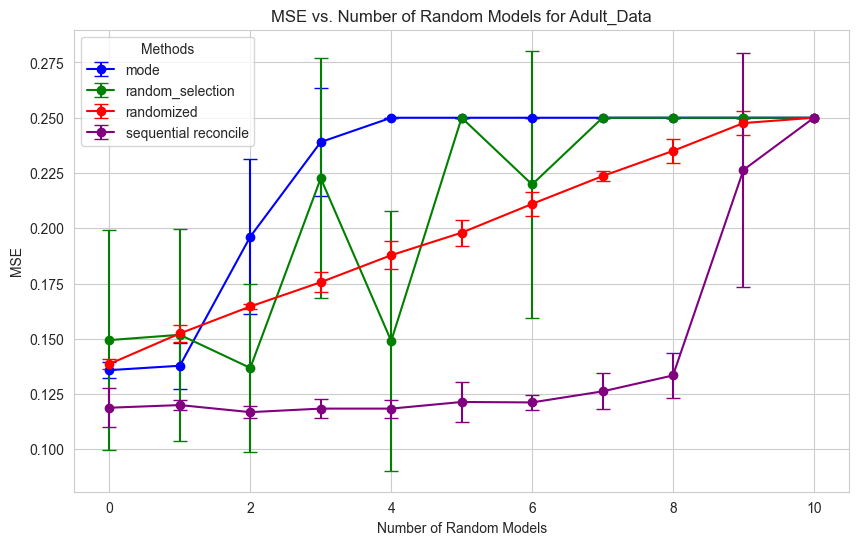

In [17]:
datasets = data['Data'].unique()
data['MSE'] = pd.to_numeric(data['MSE'], errors='coerce')

# Create separate plots for each dataset
# for dataset in datasets:
# Filter data for the current dataset
for dataset in datasets:
    # Filter data for the current dataset
    dataset_df = data[data['Data'] == dataset]
    
    # Group by Method and number of random models, and calculate mean and std
    grouped = dataset_df.groupby(['Method', 'number of random models'])
    mean_mse = grouped['MSE'].mean().reset_index(name='mean_mse')
    std_mse = grouped['MSE'].std().reset_index(name='std_mse')

    # Merge mean and std into a single DataFrame
    plot_data = pd.merge(mean_mse, std_mse, on=['Method', 'number of random models'])

    # Plot the data
    plt.figure(figsize=(10, 6))
    methods = plot_data['Method'].unique()
    colors = ['blue', 'green', 'red', 'purple']

    for i, method in enumerate(methods):
        method_data = plot_data[plot_data['Method'] == method]
        plt.errorbar(
            method_data['number of random models'],  # X-axis
            method_data['mean_mse'],  # Y-axis (mean MSE)
            yerr=method_data['std_mse'],  # Error bars (std MSE)
            fmt='-o', label=method, color=colors[i], capsize=5
        )

    # Customize the plot
    plt.title(f'MSE vs. Number of Random Models for {dataset}')
    plt.xlabel('Number of Random Models')
    plt.ylabel('MSE')
    plt.legend(title='Methods')
    plt.grid(True)

    # Show the plot
    plt.show()

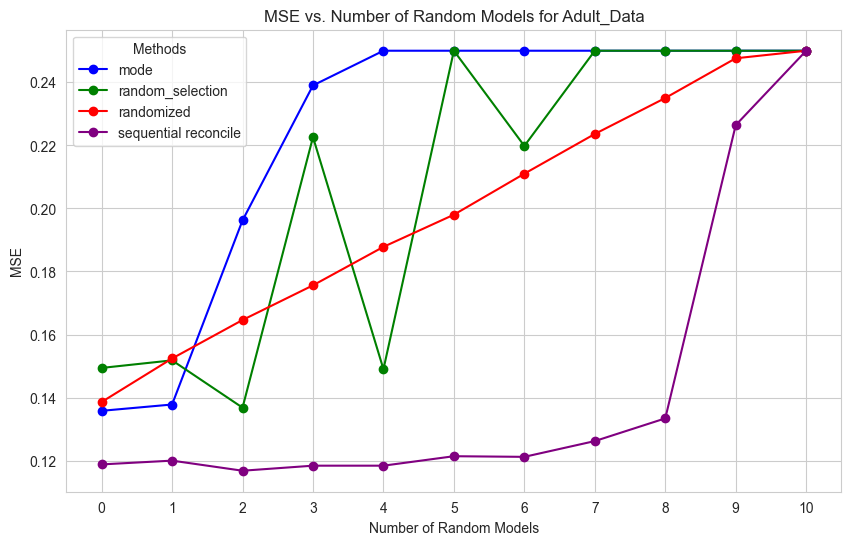

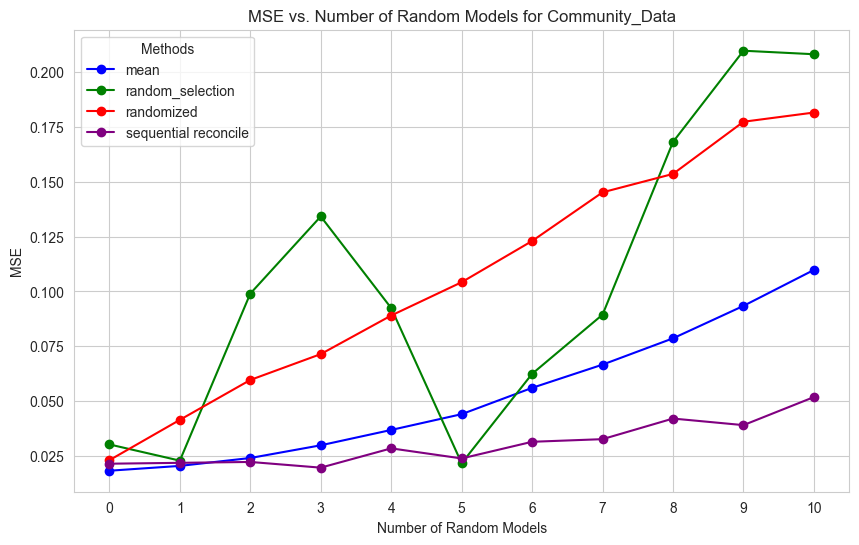

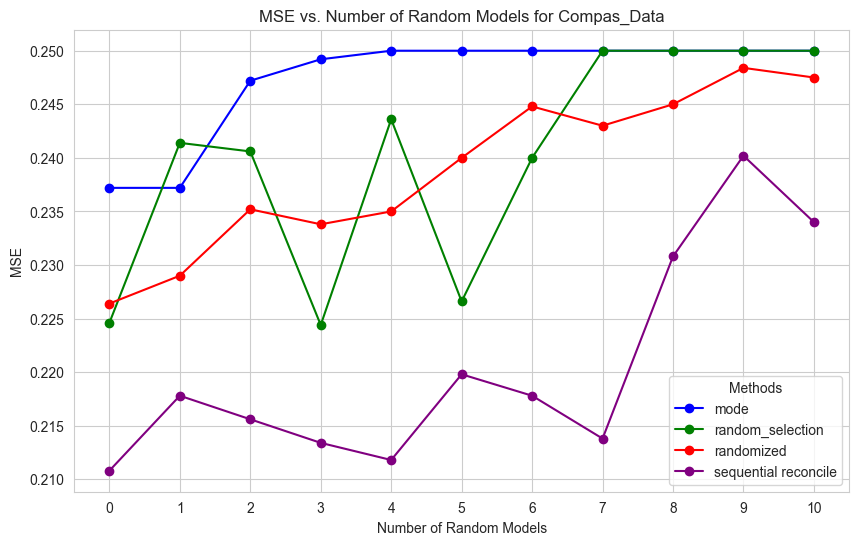

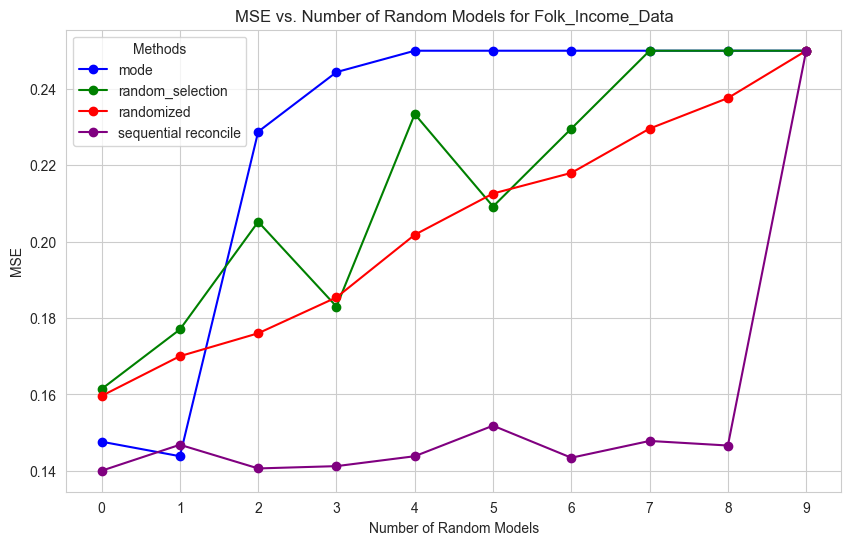

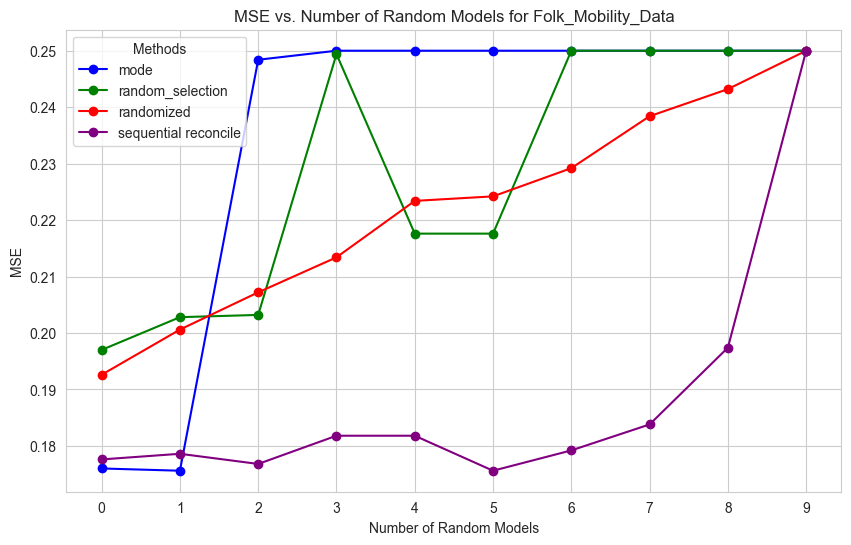

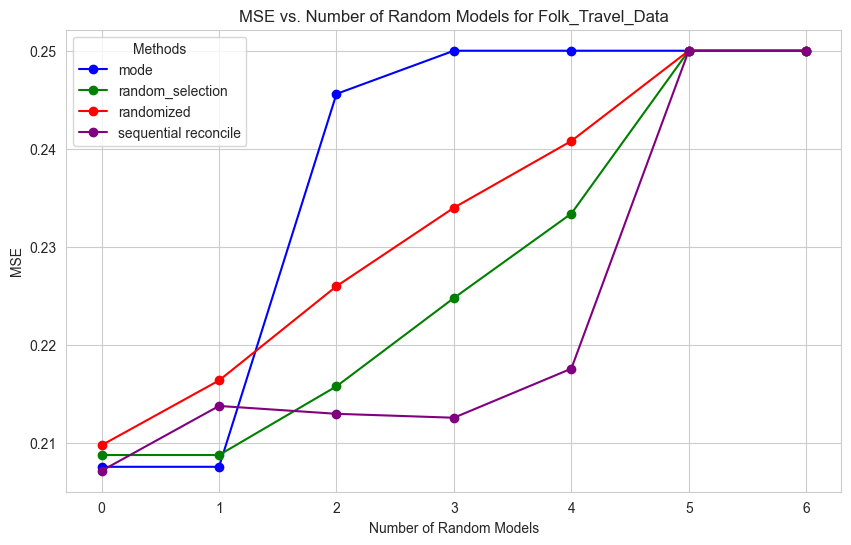

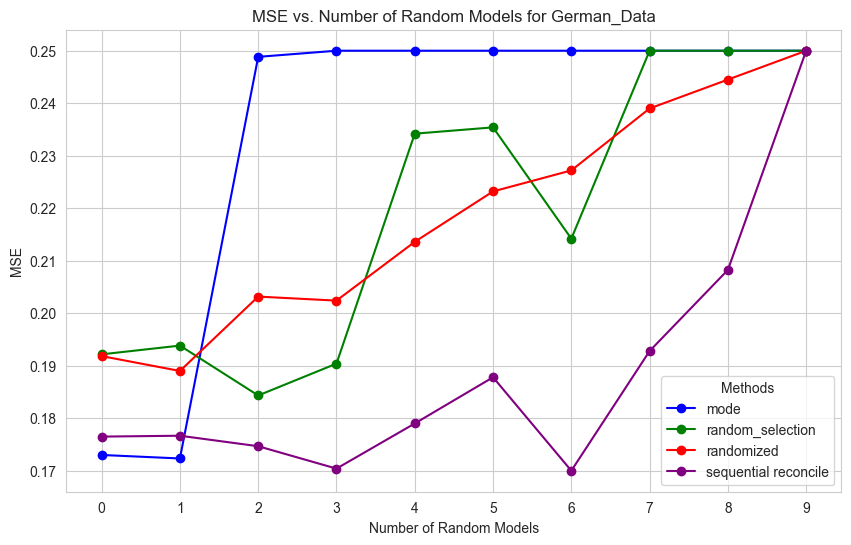

In [21]:
for dataset in datasets:
    # Filter data for the current dataset
    dataset_df = data[data['Data'] == dataset]
    grouped = dataset_df.groupby(['Method', 'number of random models'])
    mean_mse = grouped['MSE'].mean().reset_index(name='mean_mse')

    # Step 3: Prepare x-axis range
    x_values = dataset_df['number of random models'].unique()
    x_values.sort()
    
    # Step 4: Plot the data
    plt.figure(figsize=(10, 6))
    methods = mean_mse['Method'].unique()
    colors = ['blue', 'green', 'red', 'purple']
    
    for i, method in enumerate(methods):
        method_data = mean_mse[mean_mse['Method'] == method]
        plt.plot(
            method_data['number of random models'],  # X-axis
            method_data['mean_mse'],  # Y-axis (mean MSE)
            '-o', label=method, color=colors[i]
        )
    
    # Customize the plot
    plt.title(f'MSE vs. Number of Random Models for {dataset}')
    plt.xlabel('Number of Random Models')
    plt.ylabel('MSE')
    plt.xticks(x_values)  # Ensure all x values are labeled
    plt.legend(title='Methods')
    plt.grid(True)
    
    # Show the plot
    plt.show()

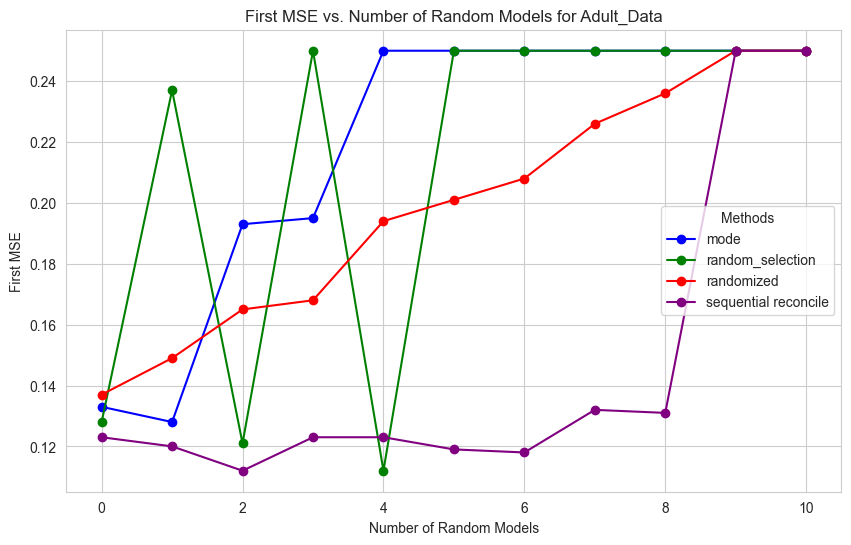

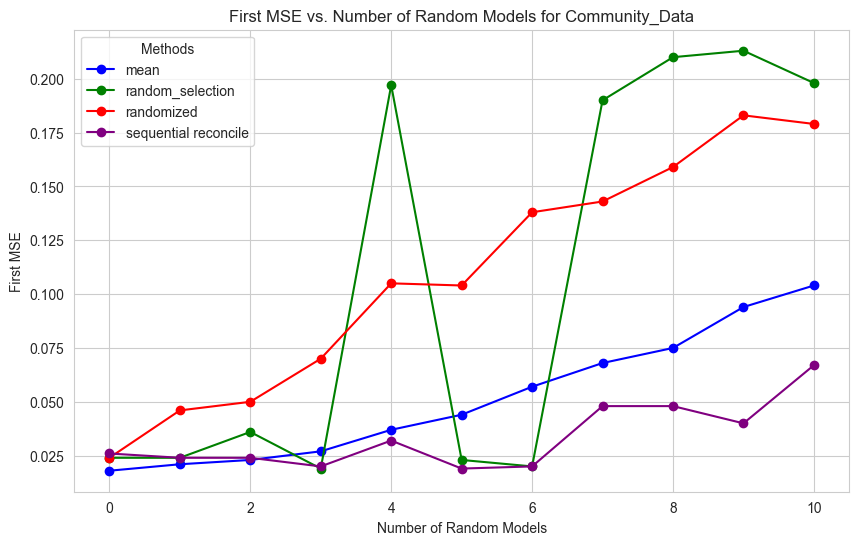

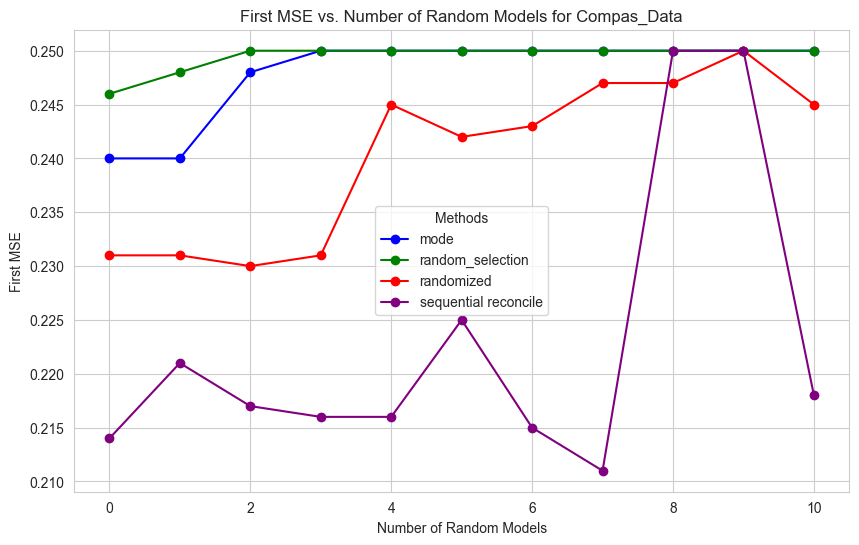

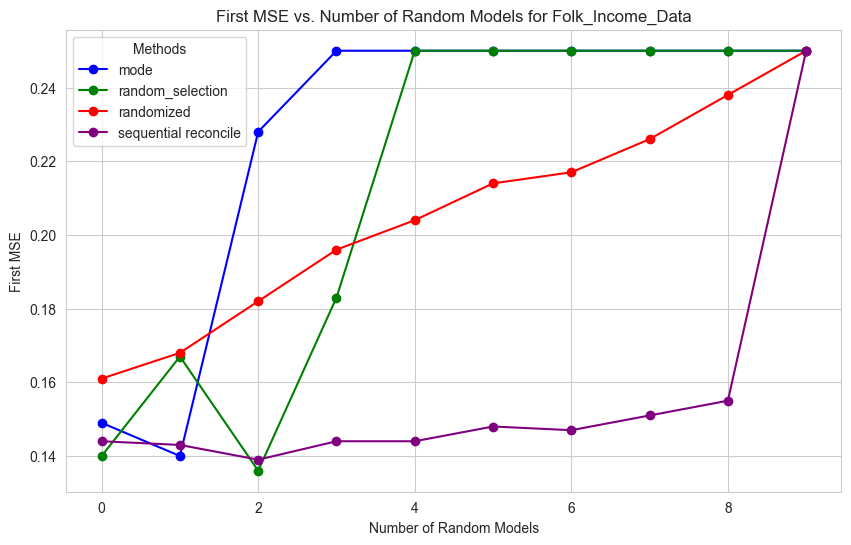

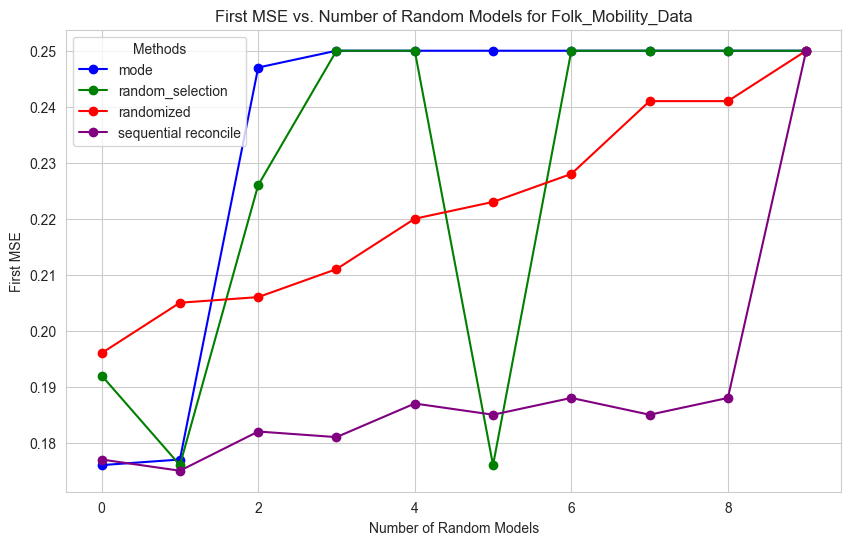

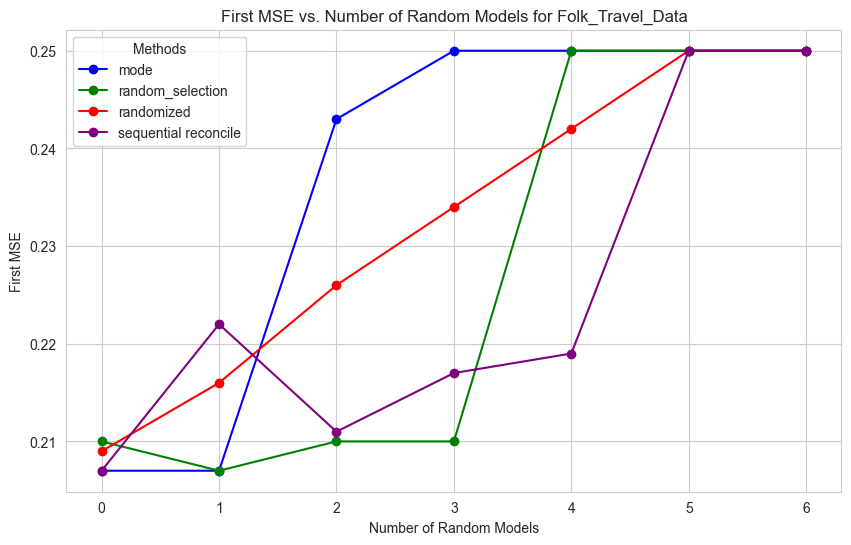

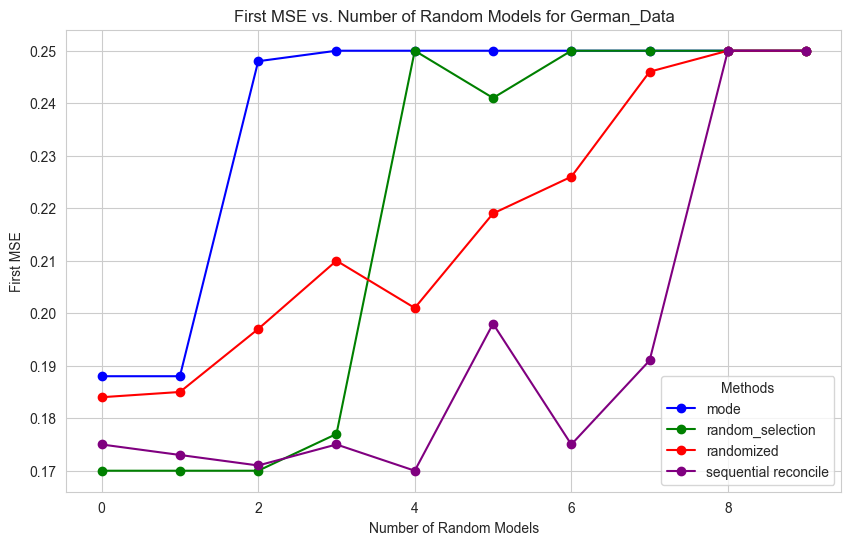

In [20]:
filtered_df = (
    data.groupby(['Data', 'Method', 'number of random models'])
    .first()
    .reset_index()
)

# Step 2: Plot the data for one dataset at a time
datasets = filtered_df['Data'].unique()

for dataset in datasets:
    dataset_df = filtered_df[filtered_df['Data'] == dataset]
    
    plt.figure(figsize=(10, 6))
    methods = dataset_df['Method'].unique()
    colors = ['blue', 'green', 'red', 'purple']

    for i, method in enumerate(methods):
        method_data = dataset_df[dataset_df['Method'] == method]
        plt.plot(
            method_data['number of random models'],  # X-axis
            method_data['MSE'],  # Y-axis
            '-o', label=method, color=colors[i]
        )

    # Customize the plot
    plt.title(f'First MSE vs. Number of Random Models for {dataset}')
    plt.xlabel('Number of Random Models')
    plt.ylabel('First MSE')
    plt.legend(title='Methods')
    plt.grid(True)

    # Show the plot
    plt.show()